In [24]:
import mne
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
file_path = r'C:\Users\omarh\Documents\GaTech\Project-InnerSpeech\Data\ds004196\sub-01\ses-EEG\eeg\sub-01_ses-EEG_task-inner_eeg.bdf'
eeg_data = mne.io.read_raw_bdf(file_path, preload=True)

channels_tsv_path = r'C:\Users\omarh\Documents\GaTech\Project-InnerSpeech\Data\ds004196\sub-01\ses-EEG\eeg\sub-01_ses-EEG_task-inner_channels.tsv'
channels_info = pd.read_csv(channels_tsv_path, sep='\t')

events_tsv_path = r'C:\Users\omarh\Documents\GaTech\Project-InnerSpeech\Data\ds004196\sub-01\ses-EEG\eeg\sub-01_ses-EEG_task-inner_events.tsv'
events_info = pd.read_csv(events_tsv_path, sep='\t')

Extracting EDF parameters from C:\Users\omarh\Documents\GaTech\Project-InnerSpeech\Data\ds004196\sub-01\ses-EEG\eeg\sub-01_ses-EEG_task-inner_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 696319  =      0.000 ...  1359.998 secs...


In [26]:
# Step 2: Set the montage
# Use available channels in the EEG data that match with channels from the TSV file
available_channels = set(eeg_data.ch_names).intersection(set(channels_info['name']))
eeg_data.pick_channels(list(available_channels))
montage = mne.channels.make_standard_montage('biosemi64')
eeg_data.set_montage(montage, on_missing='ignore')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawEDF | sub-01_ses-EEG_task-inner_eeg.bdf, 60 x 696320 (1360.0 s), ~318.8 MB, data loaded>

In [27]:
# Step 3: Set the EEG reference
# A common average reference or specific electrode reference is typically used. Here, we use the average.
eeg_data.set_eeg_reference('average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | sub-01_ses-EEG_task-inner_eeg.bdf, 60 x 696320 (1360.0 s), ~318.8 MB, data loaded>

In [28]:
# Step 4: Apply a high-pass filter
# A high-pass filter is used to remove very slow drifts in the signal.
# Here, we filter frequencies below 1 Hz.
eeg_data.filter(l_freq=1.0, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEDF | sub-01_ses-EEG_task-inner_eeg.bdf, 60 x 696320 (1360.0 s), ~318.8 MB, data loaded>

In [29]:
# Step 5: Apply a low-pass filter
# A low-pass filter is used to remove high-frequency noise.
# Here, we filter frequencies above 40 Hz.
eeg_data.filter(l_freq=None, h_freq=40.0)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 169 samples (0.330 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<RawEDF | sub-01_ses-EEG_task-inner_eeg.bdf, 60 x 696320 (1360.0 s), ~318.8 MB, data loaded>

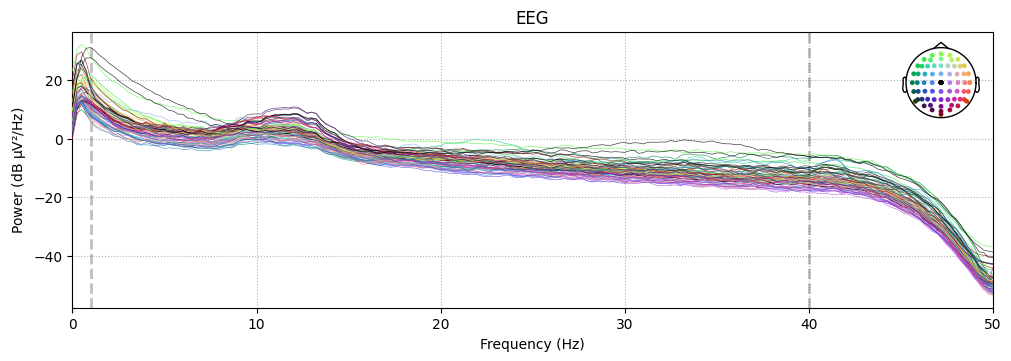

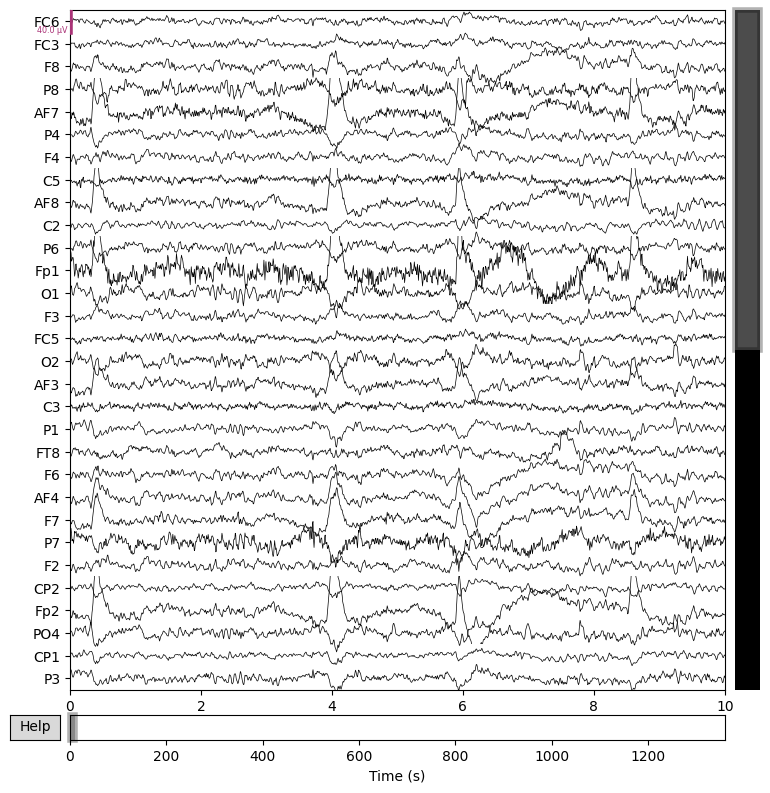

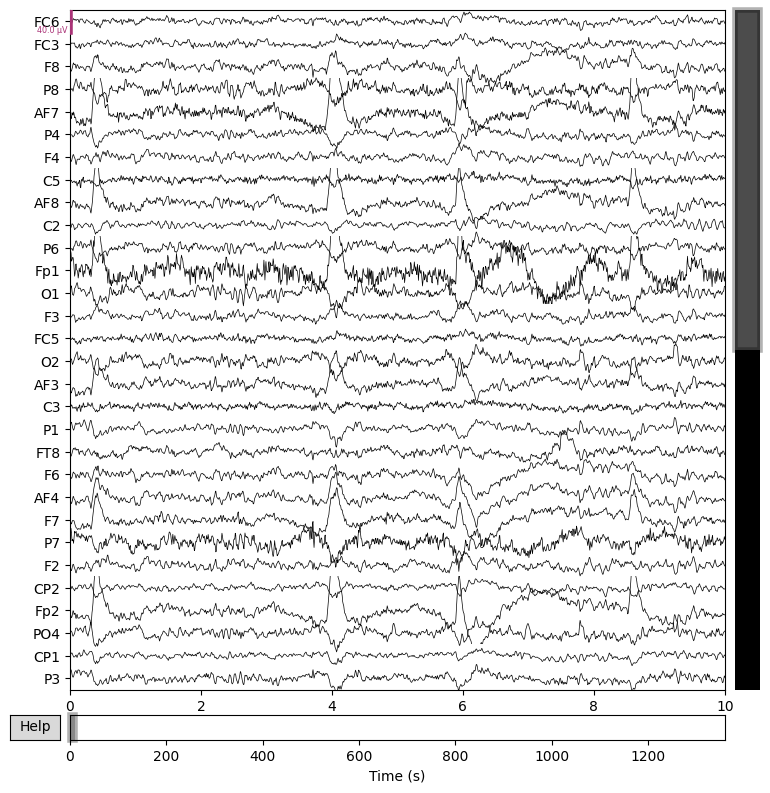

In [30]:
# Step 6: Plot the raw data
# This step is useful to visually inspect the data for obvious artifacts.
eeg_data.plot(duration=10, n_channels=30)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


c:\Users\omarh\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


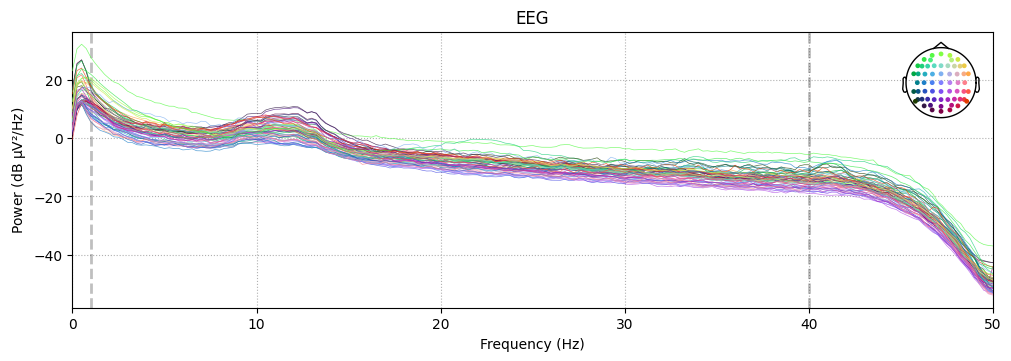

In [31]:
# Step 7: Plot power spectral density (PSD)
# This helps to visualize the frequency content of the signal and assess the effectiveness of filtering.
eeg_data.plot_psd(fmax=50)

In [32]:
eeg_data.info

<Info | 10 non-empty values
 bads: []
 ch_names: FC6, FC3, F8, P8, AF7, P4, F4, C5, AF8, C2, P6, Fp1, O1, F3, ...
 chs: 60 EEG
 custom_ref_applied: True
 dig: 63 items (3 Cardinal, 60 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2022-02-23 10:08:58 UTC
 nchan: 60
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>